In [1]:
import re 
import nltk
import ssl
import pandas as pd 
import numpy as np
import scipy.stats as ss
import seaborn as sns
from sklearn.metrics import confusion_matrix

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/seul/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
vader = SentimentIntensityAnalyzer()

In [3]:
data = pd.read_csv('../answer-key/testing_set.csv')
data.head()

,Unnamed: 0,Review,Liked
0,0,Wow... Loved this place.,1
1,1,Crust is not good.,0
2,2,Not tasty and the texture was just nasty.,0
3,3,Stopped by during the late May bank holiday of...,1
4,4,The selection on the menu was great and so wer...,1


In [4]:
all_scores = []
answers = []
compound = []

In [5]:
for i in range(len(data)): 
    review = data.iloc[i].Review 
    liked = data.iloc[i].Liked
    
    current = vader.polarity_scores(review) 
    compound.append(current["compound"])
    if current["compound"] < 0: 
        all_scores.append(0)
    else: 
        all_scores.append(1)
        
    answers.append(liked)

In [6]:
counter = 0
for i in range(len(answers)):
    if all_scores[i] == answers[i]: 
        counter += 1

print(counter)

229


In [7]:
print(counter/len(answers))

0.7633333333333333


In [8]:
cm = confusion_matrix(all_scores, answers)
print ("Confusion Matrix:\n",cm)

Confusion Matrix:
 [[ 69   5]
 [ 66 160]]


In [9]:
business = pd.read_csv("cleaned_business.csv")
reviews = pd.read_csv("cleanish_reviews.csv") 
ids = pd.read_csv('list_buiss_id.txt', sep=" ", header=None)
ids.columns = ["id"]

In [10]:
columns = ["business_id", "business_name", "our_score", "stars"]
final_results = pd.DataFrame(columns=columns)

In [11]:
array = []
for i in range(len(ids)): 
    id_curr = ids.iloc[i].id
    all_reviews = reviews[reviews["business_id"] == id_curr]
    current = vader.polarity_scores(str(all_reviews["text"]))
        
    curr_buis = business.loc[business['business_id'] == id_curr]
    curr_star = (curr_buis["stars"].values[0]/5)*100
    
    final_results = final_results.append({"business_id":id_curr, "business_name":curr_buis["name"].values[0],"our_score":current["compound"]*100, "stars":curr_star}, ignore_index = True)

In [12]:
final_results.head(10)

,business_id,business_name,our_score,stars
0,s2B_ZeSGTlQ3qbm0dOY5rg,Hwy 55 Burgers Shakes & Fries,-80.60,60.0
1,tYYJYqbw1zasFUCqrkawKQ,Eagles Buffet,31.29,70.0
2,wtDLILBaj5BGEbYvWGfNUw,Duck Donuts,99.92,80.0
3,Mnu3EPpuzu3UUN1PIwFRoQ,Maui Pasta,99.95,90.0
4,MrSHPvHVdE_VzVN7iRz45Q,Enso Asian Bistro & Sushi Bar,98.12,70.0
5,qGtagj4xXNrF9rIEkiihTw,Orchid Thai,99.92,90.0
6,uejutOD4_-IUaY5cKkpezg,Rush Espresso Cafe and Wine Bar,96.26,80.0
7,ACRXKq6Ngtktnvf6rdcGwQ,Cracker Barrel Old Country Store,19.07,70.0
8,W3K_5U2KEw0gxK7cvuB2mw,Mitzie's Jerk,95.61,80.0
9,aBLx9JlAMq_AuW6VAImSwg,Zada Jane's Corner Cafe,91.33,70.0


In [13]:
ss.pearsonr(final_results["our_score"], final_results["stars"])

(0.36143587764695917, 0.00022020175044395904)

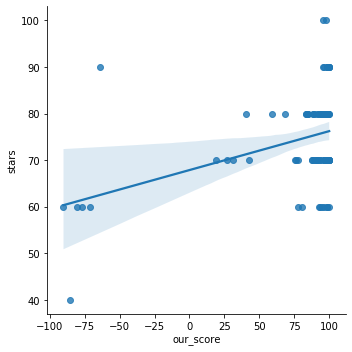

In [14]:
g = sns.lmplot(x="our_score", y="stars", data=final_results)

In [15]:
final_results.filter(items=["our_score",'stars']).corr()

,our_score,stars
our_score,1.000000,0.361436
stars,0.361436,1.000000
